In [543]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
from matplotlib import pyplot as plt 
import pandas as pd
from scipy import stats
from functools import reduce



##### load data

In [484]:
data = pd.read_csv('data/cas_intensities.csv', delimiter=',', index_col = 0)
# only use first repliate
data = data[data["replicate"]==1]
ms_data = data.drop(columns=["replicate"])
data_dist = ms_data.copy()
data_dist["sum"] = data_dist.apply(lambda row:row.sum(), axis=1)
data_dist['median']= data_dist.apply(lambda row:row[:-1].median(), axis=1)
data_dist['mean']= data_dist.apply(lambda row:row[:-2].mean(), axis=1)
data_norm = data_dist.apply(lambda row: row[:-3]/row['mean'],axis=1)
data_norm.index = data_dist.index
data_norm2 = data_norm.apply(lambda col:col/col.median(),axis=0)
ms_data = data_norm2

In [485]:
import numpy as np
df = ms_data
scaled_data = 3 * ((df - df.mean()) / df.std())

# Clip values to be within -3 and 3
scaled_data = np.clip(scaled_data, -3, 3)

# Check mean and standard deviation
print(scaled_data.mean())
print(scaled_data.std())
print(scaled_data.min(), scaled_data.max())


6485-40-1     -0.435880
3033-23-6      0.075711
21284-22-0    -0.418053
38427-78-0    -0.383695
495-61-4      -0.413705
                 ...   
713-95-1      -0.224200
20307-84-0    -0.413705
120021-96-7   -0.413705
586-62-9      -0.325871
710-04-3      -0.163435
Length: 732, dtype: float64
6485-40-1      1.894324
3033-23-6      2.302065
21284-22-0     1.891729
38427-78-0     2.084914
495-61-4       2.058207
                 ...   
713-95-1       2.258621
20307-84-0     2.058207
120021-96-7    2.058207
586-62-9       2.155720
710-04-3       1.986596
Length: 732, dtype: float64
6485-40-1     -3.0
3033-23-6     -3.0
21284-22-0    -3.0
38427-78-0    -3.0
495-61-4      -3.0
              ... 
713-95-1      -3.0
20307-84-0    -3.0
120021-96-7   -3.0
586-62-9      -3.0
710-04-3      -3.0
Length: 732, dtype: float64 6485-40-1      3.0
3033-23-6      3.0
21284-22-0     3.0
38427-78-0     3.0
495-61-4       3.0
              ... 
713-95-1       3.0
20307-84-0     3.0
120021-96-7    3.0
586-62-9

In [487]:
panelist_data_df = pd.read_table("data/vlb_data_combined.txt", delimiter=',', index_col = 1)
panelist_data_df = panelist_data_df[panelist_data_df["panelist"]==1]
panelist_data_df = panelist_data_df.drop(columns=["panelist", "date"])

In [488]:
# get only comparable samplekeys
valid_indexes = [index for index in panelist_data_df.index if index in ms_data.index]
ms_data_comp = scaled_data.loc[valid_indexes].fillna(0)
panelist_data_comp = panelist_data_df.loc[valid_indexes]

In [489]:
# find CAS number to each molecule
CAS_to_mol = pd.read_table("data/CAS_mol_OD.csv", delimiter=',',  names= ["CAS","intensity", "odor"])
CAS_to_mol=CAS_to_mol.drop(columns=["intensity","odor"])
CAS_to_mol= CAS_to_mol.drop_duplicates()

In [490]:
# all molecules that where labeled as sweet in flavornet
sweet_descriptors = ["benzyl alcohol","ethyl phenylacetate","tridecanal","nerol","methyl hexanoate","linalyl isovalerate","undecanaldehyde","caryophyllene oxide","linalyl acetate","safranal","uncineol","phenylethanal","p-anisaldehyde","eudesmol","ethylmethyl pyrazine","citronellyl butyrate","4-methyl-3-penten-2-one","nonyl acetate","10-epi-γ-eudesmol","β-bisabolol","(Z)-6-dodecene-γ-lactone","β-farnesene","2-dodecenal","γ-dodecalactone","epoxy-β-ionone","2-undecenal","styrene glycol","methyl furaneol","(-)-cis-rose oxide","(E)-β-ocimene","dimethylmethoxyfuranone","1,8-cineole","ethylbenzaldehyde","2-pentylthiophene","α-farnesene","methionol","7-methoxycoumarin","(Z)-3-hexenyl-2-methylbutanoate","o-aminoacetophenone","viridiflorol","isopiperitone","β-sinensal","ethyl vanillate","methyl butanoate","p-methoxystyrene","ethanol","6-Methoxyeugenol","4-hexanolide","δ-dodecalactone","sesquiphellandrene","diethyl malate","linalyl butyrate","guaiacol","coumarin","methyl benzoate","isopropyl benzoate","safrole","durene","γ-butyrolactone","ethyl isobutyrate","furfural"]
fruit_descriptors = ["ethyl phenylacetate", "geranyl valerate", "γ-heptalactone", "ethyl propionate", "diethyl acetal", "geranyl butyrate", "ethyl heptylate", "ethyl octanoate", "methyl hexanoate", "dimethylheptenal", "pentanone", "ethyl 3-methylbutanoate", "geranyl isovalerate", "isobutyl acetate", "ethoxypropanol", "methyl-2-butenal", "methylnonanedione", "linalyl acetate", "methyl geranate", "limonene oxide", "hydrocinnamic alcohol", "diethyl succinate", "ethyl hexanoate", "ethylmethyl pyrazine", "β-cubebene", "neryl acetate", "citronellyl butyrate", "hexyl acetate", "nonyl acetate", "butyl methylbutyrate", "pentenal", "isopentyldimethylpyrazine", "p-menth-1-en-9-ol", "hexadecanone", "octyl acetate", "γ-dodecalactone", "epoxy-β-ionone", "ethyl octenoate", "ethyl isohexanoate", "isobornyl propionate", "cedrenol", "p-menth-1-en-9-yl acetate", "cadinadiene", "(Z)-3-hexenyl hexanoate", "ethyl cyclohexanoate", "4-methylthio-2-butanone", "3,5-octadienone", "methyl cyclohexanecarboxylate", "2-pentylthiophene", "α-ocimene", "butanediol", "ethyl valerate", "pentanol", "isopiperitone", "butyl octanoate", "ethyl vanillate", "methyl butanoate", "2-methylbutyl acetate", "propyl hexanoate", "butyl hexanoate", "isopropyl butanoate", "spathulenol", "butanol", "δ-dodecalactone", "methyl quinoxaline", "sesquiphellandrene", "2-hexenol", "ethyl benzoate", "isopropyl benzoate", "ethyl lactate", "citronellyl isobutyrate"]
wood_descriptors = ["α-muurolene","cadina-1,4-dien-3-ol","isocaryophyllene","eudesmol","α-ionone","bornyl butyrate","(E)-α-bergamotene","linalool oxide","ethyl pyrazine","10-epi-γ-eudesmol","germacrene B","trans-sabinene hydrate","dihydrolinalool","isodihydrocarveol","β-farnesene","β-sesquiphellandrene","δ-elemene","α-calacorene","epoxy-β-ionone","germacrene D","bicyclogermacrene","alloaromadendrene","α-thujene","oxo-β-ionone","(-)-γ-elemene","γ-muurolene","sabinene","α-guaiene","α-copaene","γ-cadinene","nerolidol","β-eudesmol","α-cadinol","δ-cadinene","dill apiol","aromadendrene","α-gurjunene","guaiol","α-farnesene","γ-selinene","cuminica lcohol","perillen","elemol","α-humulene","β-caryophyllene","β-guaiene"]
malt_descriptors = ["pentanal","3-methyl-1-butanol","2-methyl-1-butanol","methylbutanal","isobutyraldehyde"]

In [491]:
# find cas numbers for these molecules
sweet_descriptors_CAS = [CAS_to_mol.loc[index]["CAS"]for index in sweet_descriptors if index in CAS_to_mol.index ]
fruit_descriptors_CAS = [CAS_to_mol.loc[index]["CAS"] for index in fruit_descriptors if index in CAS_to_mol.index]
wood_descriptors_CAS = [CAS_to_mol.loc[index]["CAS"] for index in wood_descriptors if index in CAS_to_mol.index]
malt_descriptors_CAS  =[CAS_to_mol.loc[index]["CAS"] for index in malt_descriptors if index in CAS_to_mol.index]

### Basic example

In [69]:
cas_range=np.linspace(-3,3,197)
#cas_range = np.array(ms_data_comp['6485-40-1'])
             
cas_001 = ctrl.Antecedent(cas_range, 'cas_001')
cas_002 = ctrl.Antecedent(cas_range, 'cas_002')
cas_003 = ctrl.Antecedent(cas_range, 'cas_003')

# Auto-membership function population is possible with .automf(3, 5, or 7)
cas_001.automf(3)
cas_002.automf(3)
cas_003.automf(3)

osa_sweet = ctrl.Consequent(np.arange(0, 100, 10), 'osa_sweet')
osa_sweet.automf(3)

# Custom membership functions can be built interactively with a familiar,
# Pythonic API
# tip['low'] = fuzz.trimf(tip.universe, [0, 0, 13])
# tip['medium'] = fuzz.trimf(tip.universe, [0, 13, 25])
# tip['high'] = fuzz.trimf(tip.universe, [13, 25, 25])

(<Figure size 432x288 with 1 Axes>, <AxesSubplot:>)

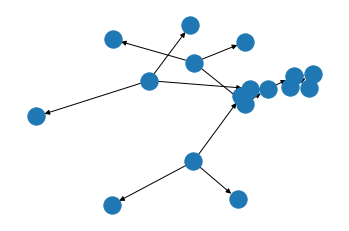

In [70]:
rule_sweet_01 = (ctrl.Rule(cas_001['good'] | cas_002['good'] |cas_003['good'], osa_sweet['good']))
rule_sweet_02 = (ctrl.Rule(cas_001['average']|  cas_002['average'] | cas_003['average'], osa_sweet['average']))
rule_sweet_03 = (ctrl.Rule(cas_001['poor']| cas_002['poor'] |cas_003['poor'], osa_sweet['poor']))

rule_sweet_01.view()

cas_001 : 3
cas_002 : 3
cas_003 : 3

74.6341463414634


c:\Users\Franz\AppData\Local\Programs\Python\Python39\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


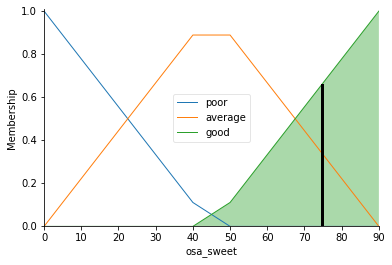

In [71]:
tipping_ctrl = ctrl.ControlSystem([
    rule_sweet_01,
    rule_sweet_02,
    rule_sweet_03
])
tipping = ctrl.ControlSystemSimulation(tipping_ctrl)
# Pass inputs to the ControlSystem using Antecedent labels with Pythonic API
# Note: if you like passing many inputs all at once, use .inputs(dict_of_data)


tipping.input['cas_001'] = 3
tipping.input['cas_002'] = 3
tipping.input['cas_003'] = 3

print(tipping.input)
# Crunch the numbers
tipping.compute()

prediction = tipping.output['osa_sweet'] 

print( prediction )
osa_sweet.view(sim=tipping)

### Sweet cw

In [537]:
sweet_ms_df = ms_data_comp[sweet_descriptors_CAS]

In [542]:
zscore_range=np.linspace(-3,3,25) # Since we only use zscored data, this range can be used everywhere 

cas_antecedents = [] # we can just use an array, since the names are saved in the antecedent objects
# we only use the sweet descriptors 
for cas in sweet_descriptors_CAS:
    cas_name = str(cas)  
    cas_antecedent = ctrl.Antecedent(zscore_range, cas_name)
    cas_antecedent.automf(3)
    
    cas_antecedents.append( cas_antecedent) 

osa_sweet = ctrl.Consequent(zscore_range, 'osa_sweet')
osa_sweet.automf(3)


rules: 

if one sweet cas is good than contributes to osa good

analog with average an poor

In [ ]:
'''rule_sweet = ctrl.Rule(create_rules('good'), osa_sweet['good'])
rule_average = ctrl.Rule(create_rules('average'), osa_sweet['average'])
rule_low = ctrl.Rule(create_rules('poor'), osa_sweet['poor'])

rules = ctrl.ControlSystem([
    rule_sweet,
    rule_average,
    rule_low
])
fuzzy_ctrl = ctrl.ControlSystemSimulation(rules)
'''

In [544]:
# define some rules 
one_good =  reduce(lambda x, y: x | y, [ caa['good'] for caa in cas_antecedents])
one_avg =  reduce(lambda x, y: x | y, [ caa['average'] for caa in cas_antecedents])

all_poor =  reduce(lambda x, y: x & y, [ caa['poor'] for caa in cas_antecedents])
all_avg =  reduce(lambda x, y: x & y, [ caa['average'] for caa in cas_antecedents])

rules = [    
    ctrl.Rule( all_poor, osa_sweet['poor']   ),
    ctrl.Rule( all_avg, osa_sweet['average'] ),
    ctrl.Rule( one_good, osa_sweet['good']   ),
]

In [545]:
# Set up the system 
fuzzy_ctrl = ctrl.ControlSystem(rules)
fuzzy = ctrl.ControlSystemSimulation(fuzzy_ctrl)

In [560]:
ms_data = stats.zscore(ms_data_comp,axis=0)
predictions = []
for index, row in ms_data.iterrows():
    for cas in sweet_descriptors_CAS:
        fuzzy.input[ cas ] = row[cas]
    
    fuzzy.compute()  
    predictions.append(fuzzy.output['osa_sweet'])

references = np.array(panelist_data_comp['Sweet'])
       

In [562]:
sweet_ms_df_zscore = stats.zscore(sweet_ms_df, axis = 0)

In [563]:
for index,entry in sweet_ms_df_zscore.loc['000656'].items():
    fuzzy.input[ index ] = entry
    
fuzzy.compute()  
predictions  = fuzzy.output['osa_sweet']

references = stats.zscore(panelist_data_comp).loc['000565']['Sweet']
       

panelist score for sweet:  0.06709556249758704
prediction score for sweet:  0.6783272961770778


c:\Users\Franz\AppData\Local\Programs\Python\Python39\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


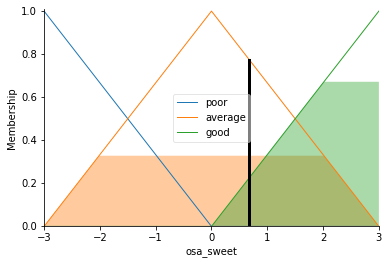

In [564]:
print("panelist score for sweet: " , references)
print("prediction score for sweet: ",predictions)

osa_sweet.view(sim=fuzzy)

In [565]:
# over all samples
predictions = []
for index, row in sweet_ms_df_zscore.iterrows():
    for cas in sweet_descriptors_CAS:
        fuzzy.input[ cas ] = row[cas]
    
    fuzzy.compute()  
    predictions.append(fuzzy.output['osa_sweet'])

references = np.array(panelist_data_comp['Sweet'])
       

(array([ 2.,  8., 24., 28., 40., 35., 20.,  0., 19., 21.]),
 array([0.09395177, 0.16665042, 0.23934907, 0.31204772, 0.38474637,
        0.45744502, 0.53014367, 0.60284232, 0.67554097, 0.74823962,
        0.82093826]),
 <BarContainer object of 10 artists>)

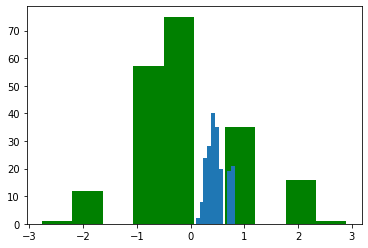

In [566]:
plt.hist(stats.zscore(references), color='g')
plt.hist(predictions)

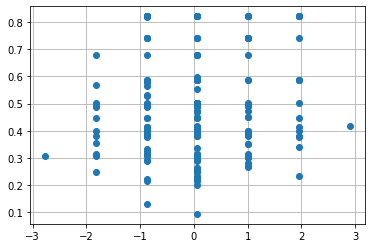

In [567]:
plt.plot(stats.zscore(references),predictions,"o")
plt.grid()

### 1 on 1 rules approach

In [616]:
sweet_ms_df = stats.zscore(ms_data_comp[sweet_descriptors_CAS])

In [630]:
max(sweet_ms_df.max())

2.1859807496782344

In [631]:
zscore_range=np.linspace(min(sweet_ms_df.min()),max(sweet_ms_df.max()), 1000) # Since we only use zscored data, this range can be used everywhere 

cas_antecedents = [] # we can just use an array, since the names are saved in the antecedent objects
# we only use the sweet descriptors 
for cas in sweet_descriptors_CAS:
    cas_name = str(cas)  
    cas_antecedent = ctrl.Antecedent(zscore_range, cas_name)
    cas_antecedent.automf(3)
    
    cas_antecedents.append( cas_antecedent) 
    
osa_sweet = ctrl.Consequent(zscore_range, 'osa_sweet')
osa_sweet.automf(3)

In [640]:
rule_list = []
for cas_sweet in cas_antecedents:
    rule_list.append(ctrl.Rule(cas_sweet['good'], osa_sweet['good']))
    rule_list.append(ctrl.Rule(cas_sweet['average'], osa_sweet['average']))
    rule_list.append(ctrl.Rule(cas_sweet['poor'], osa_sweet['poor']))


In [641]:
# Set up the system 
fuzzy_ctrl = ctrl.ControlSystem(rules)
fuzzy = ctrl.ControlSystemSimulation(fuzzy_ctrl)

In [642]:
for index,entry in sweet_ms_df.loc['000930'].items():
    fuzzy.input[ index ] = entry
    
fuzzy.compute()  
predictions  = fuzzy.output['osa_sweet']

references = stats.zscore(panelist_data_comp).loc['000930']['Sweet']

print("panelist score for sweet: " , references)
print("prediction score for sweet: ", predictions)

panelist score for sweet:  2.8994868079314258
prediction score for sweet:  0.41735833472444034


In [644]:
for index,entry in sweet_ms_df.loc['000656'].items():
    fuzzy.input[ index ] = entry
    
fuzzy.compute()  
predictions  = fuzzy.output['osa_sweet']

references = stats.zscore(panelist_data_comp).loc['000656']['Sweet']

print("panelist score for sweet: " , references)
print("prediction score for sweet: ", predictions)

panelist score for sweet:  -0.877034852647026
prediction score for sweet:  0.6783272961770778


### 7 parameters

In [656]:
zscore_range=np.linspace(-3,3,61) # Since we only use zscored data, this range can be used everywhere 

cas_antecedents = [] # we can just use an array, since the names are saved in the antecedent objects
# we only use the sweet descriptors 
for cas in sweet_descriptors_CAS:
    cas_name = str(cas)  
    cas_antecedent = ctrl.Antecedent(zscore_range, cas_name)
    cas_antecedent.automf(7)
    
    cas_antecedents.append( cas_antecedent) 
    
#osa_sweet = ctrl.Consequent(zscore_range, 'osa_sweet')
osa_sweet = ctrl.Consequent(np.arange(0, 100, 1), 'osa_sweet')

osa_sweet.automf(7)

In [659]:
rule_list = []
def rule_maker(cas_sweet):
    rule_list.append(ctrl.Rule(cas_sweet['good'], osa_sweet['good']))
    rule_list.append(ctrl.Rule(cas_sweet['excellent'], osa_sweet['excellent']))
    rule_list.append(ctrl.Rule(cas_sweet['decent'], osa_sweet['decent']))
    rule_list.append(ctrl.Rule(cas_sweet['mediocre'], osa_sweet['mediocre']))
    rule_list.append(ctrl.Rule(cas_sweet['average'], osa_sweet['average']))
    rule_list.append(ctrl.Rule(cas_sweet['poor'], osa_sweet['poor']))
    rule_list.append(ctrl.Rule(cas_sweet['dismal'], osa_sweet['dismal']))



In [660]:
for cas_antecedent in cas_antecedents:
    rule_maker(cas_antecedent)

In [663]:
fuzzy_ctrl = ctrl.ControlSystem(rule_list)
fuzzy = ctrl.ControlSystemSimulation(fuzzy_ctrl)

panelist score for sweet:  50
prediction score for sweet:  51.594845158088724


c:\Users\Franz\AppData\Local\Programs\Python\Python39\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


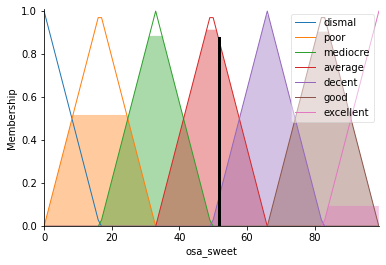

In [664]:
for index, intensitiy in sweet_ms_df.loc['000839'].items():
    fuzzy.input[index] = intensitiy
    
fuzzy.compute()

prediction = fuzzy.output['osa_sweet'] 
references = (panelist_data_comp).loc['000839']['Sweet']

print("panelist score for sweet: " , references)
print("prediction score for sweet: ", prediction)

osa_sweet.view(sim=fuzzy)

panelist score for sweet:  60
prediction score for sweet:  52.96842346784346


c:\Users\Franz\AppData\Local\Programs\Python\Python39\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


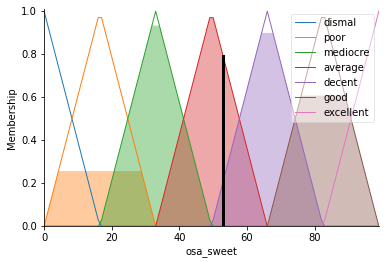

In [668]:
for index, intensitiy in sweet_ms_df.loc['000425'].items():
    fuzzy.input[index] = intensitiy
    
fuzzy.compute()

prediction = fuzzy.output['osa_sweet'] 
references = panelist_data_comp.loc['000425']['Sweet']

print("panelist score for sweet: " , references)
print("prediction score for sweet: ", prediction)

osa_sweet.view(sim=fuzzy)

In [683]:
sweet_ms_df

,100-51-6,101-97-3,10486-19-8,106-25-2,106-70-7,1118-27-0,112-44-7,1139-30-6,115-95-7,116-26-7,...,78-36-4,90-05-1,91-64-5,93-58-3,939-48-0,94-59-7,95-93-2,96-48-0,97-62-1,98-01-1
sample_key,,,,,,,,,,,,,,,,,,,,,
000656,1.120077,-0.273488,-1.125615,0.590098,-1.052540,-0.296693,0.903637,-1.176447,-1.256853,1.080274,...,-1.066894,1.240920,1.543360,-0.004614,-0.273488,-0.759041,1.16895,NaN,-1.026038,NaN
000657,0.223888,-0.644132,-1.301555,1.348245,-1.275200,-1.207881,0.871206,-1.294999,-1.256853,0.336258,...,-1.293400,1.081650,-0.595761,-0.646396,-0.644132,-0.901358,1.00688,NaN,-1.169469,NaN
000658,0.499541,0.610953,-0.395512,0.012166,-0.964711,-0.330483,0.433093,-0.214874,-0.233203,0.518724,...,-0.381319,0.756957,-0.595920,0.190751,0.610953,0.492343,0.83622,NaN,-0.505596,NaN
000838,-0.750047,0.770240,-0.229632,-0.494955,1.675332,2.095377,-1.343200,1.551961,1.282346,1.725824,...,1.667013,-1.502222,0.879944,1.538547,0.770240,-0.363146,-1.38869,NaN,0.863139,NaN
000839,-1.377334,0.492080,-0.790020,1.019178,1.193850,2.095377,-1.343200,0.489983,-0.884875,1.879052,...,0.891104,-1.502222,1.543360,-1.185561,0.492080,1.341003,-1.38869,NaN,-1.191403,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
000925,-0.728899,0.632996,0.786983,-0.801354,0.636852,-0.736739,1.113349,-0.075852,0.169599,-0.656721,...,-0.672164,1.136083,0.950417,-0.581977,0.632996,1.139114,1.16895,NaN,-0.187956,NaN
000926,0.478238,0.835232,-0.097278,-0.783738,-1.092028,-0.679681,1.113349,-0.376078,0.394255,1.051482,...,-0.260702,1.240920,0.025232,0.681588,0.835232,1.112562,1.16895,NaN,-0.259641,NaN
000927,-0.678927,1.555067,0.396214,-1.080677,-0.657614,-0.669729,1.113349,0.435182,0.956004,-0.675703,...,-0.450153,0.633343,-0.077152,-0.138155,1.555067,1.299486,1.16895,NaN,-0.553303,NaN


panelist score for sweet:  60
prediction score for sweet:  52.96842346784346


c:\Users\Franz\AppData\Local\Programs\Python\Python39\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


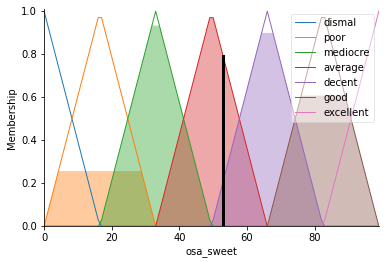

In [688]:
for index, intensitiy in sweet_ms_df.loc['000425'].items():
    fuzzy.input[index] = intensitiy
    
fuzzy.compute()

prediction = fuzzy.output['osa_sweet'] 
references = panelist_data_comp.loc['000425']['Sweet']

print("panelist score for sweet: " , references)
print("prediction score for sweet: ", prediction)

osa_sweet.view(sim=fuzzy)

In [669]:
predictions = []
for index, row in sweet_ms_df.iterrows():
    for cas in sweet_descriptors_CAS:
        fuzzy.input[ cas ] = row[cas]
    
    fuzzy.compute()  
    predictions.append(fuzzy.output['osa_sweet'])

references = np.array(panelist_data_comp['Sweet'])



(array([ 1.,  1.,  3., 17., 15., 31., 95., 22.,  4.,  8.]),
 array([42.40787891, 43.8959557 , 45.38403249, 46.87210927, 48.36018606,
        49.84826285, 51.33633963, 52.82441642, 54.31249321, 55.80056999,
        57.28864678]),
 <BarContainer object of 10 artists>)

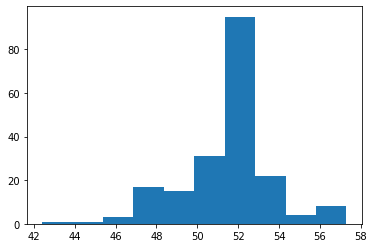

In [670]:
plt.hist(predictions)    
# all predicitions are between 40 and 60 ? 

(array([ 1., 12.,  0., 57.,  0., 75., 35.,  0., 16.,  1.]),
 array([10., 16., 22., 28., 34., 40., 46., 52., 58., 64., 70.]),
 <BarContainer object of 10 artists>)

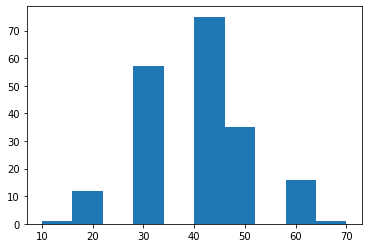

In [671]:
plt.hist(references)

Text(0.5, 1.0, 'Correlation: -0.03738773146927827')

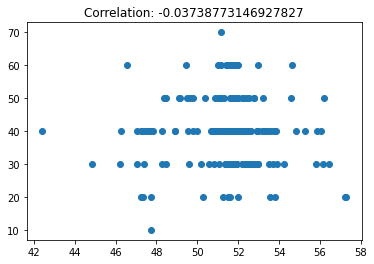

In [672]:
plt.plot(predictions, references,'o')
plt.title("Correlation: "+ str(np.corrcoef(predictions, references)[0,1]))


### Try and Error:

cas_001 : -3
cas_002 : -3
cas_003 : -3

5.999999999999999


c:\Users\Franz\AppData\Local\Programs\Python\Python39\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


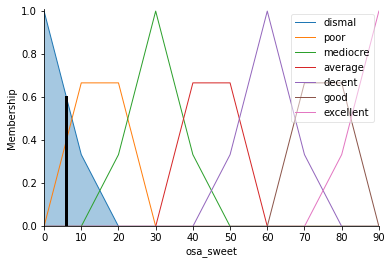

In [347]:
# basic example 

cas_range=np.linspace(-3,3,197)
zscore_range=np.linspace(-3,3,25) # Since we only use zscored data, this range can be used everywhere 
#cas_range = np.array(ms_data_comp['6485-40-1'])
             
cas_001 = ctrl.Antecedent(zscore_range, 'cas_001')
cas_002 = ctrl.Antecedent(zscore_range, 'cas_002')
cas_003 = ctrl.Antecedent(zscore_range, 'cas_003')

# Auto-membership function population is possible with .automf(3, 5, or 7)
cas_001.automf(7)
cas_002.automf(7)
cas_003.automf(7)

#osa_sweet = ctrl.Consequent(cas_range, 'osa_sweet')
osa_sweet = ctrl.Consequent(np.arange(0, 100, 10), 'osa_sweet')
osa_sweet.automf(7)


rule_list = []
def rule_maker(cas_sweet):
    rule_list.append(ctrl.Rule(cas_sweet['good'], osa_sweet['good']))
    rule_list.append(ctrl.Rule(cas_sweet['excellent'], osa_sweet['excellent']))
    rule_list.append(ctrl.Rule(cas_sweet['decent'], osa_sweet['decent']))
    rule_list.append(ctrl.Rule(cas_sweet['mediocre'], osa_sweet['mediocre']))
    rule_list.append(ctrl.Rule(cas_sweet['average'], osa_sweet['average']))
    rule_list.append(ctrl.Rule(cas_sweet['poor'], osa_sweet['poor']))
    rule_list.append(ctrl.Rule(cas_sweet['dismal'], osa_sweet['dismal']))

rule_maker(cas_001)
rule_maker(cas_002)
rule_maker(cas_003)

fuzzy_ctrl = ctrl.ControlSystem(rule_list)
fuzzy = ctrl.ControlSystemSimulation(fuzzy_ctrl)
# Pass inputs to the ControlSystem using Antecedent labels with Pythonic API
# Note: if you like passing many inputs all at once, use .inputs(dict_of_data)


fuzzy.input['cas_001'] = -3
fuzzy.input['cas_002'] = -3
fuzzy.input['cas_003'] = -3
print(fuzzy.input)
# Crunch the numbers
fuzzy.compute()

prediction = fuzzy.output['osa_sweet'] 

print( prediction )
osa_sweet.view(sim=fuzzy)